## <center>  Home Assignment #2: Network models </center>

### <center> Student: Gleb Filatov </center>

In [1]:
%matplotlib inline
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random 
import networkx as nx
from collections import Counter

After importing all required libraries, let's define few useful functions:

In [2]:
#return m unique elements from sequence
def _random_subset(seq,m):

    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets
#generate graph according to model A with n total vertices and m edges connected at each timestep
def growg(n,m):
    G = nx.complete_graph(m) 
    targets=list(range(m))
    source = m
    nodes = G.nodes()
    while source < n:        
        G.add_edges_from(zip([source]*m,targets))
        nodes.append(source)
        targets = _random_subset(nodes,m)
        source+=1 
    return G
#generate graph according to model B with n total vertices and m edges connecting each time we choose a new node
def prefg(n,m):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = G.nodes()    
    for i in range(n):       
        #lst = G.neighbors(i)
        #a = [node for node in nodes if node != i and node not in lst ]  
        r = random.randint(1,m)
        targets=_random_subset(nodes,r)
        edges = zip([i]*r,targets)
        G.add_edges_from(edges)
        nodes.extend(targets)
        nodes.extend([i]*r)
        #print(i)
       
    return G
#plotting function for pdf of G
def plot_pdf(G):
    deg_dict = G.degree()
    deg_freq = Counter(deg_dict.values())
    y = list(deg_freq.values())
    x = list(deg_freq.keys())    
    n = sum(y)
    plt.plot(x,np.dot(y,1/n), 'ro')
    plt.ylabel('probablity')
    plt.xlabel('degree')
#plotting function for cdf of G  
def plot_cdf(G):
    deg_dict = G.degree()
    deg_freq = Counter(deg_dict.values())
    y = list(deg_freq.values())
    x = list(deg_freq.keys()) 
    n = sum(y)
    y_cdf = np.cumsum(np.dot(y,1/n))
    plt.plot(x,y_cdf, 'ro')
    plt.ylabel('probablity')
    plt.xlabel('degree')

For example let's now generate two graphs according to model A with N=1000 and N=2000 with same m =20

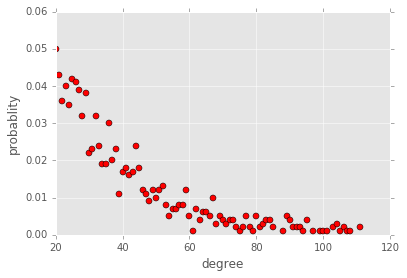

In [26]:
G1 = growg(1000,20)
G2 = growg(2000,20)
plot_pdf(G1)

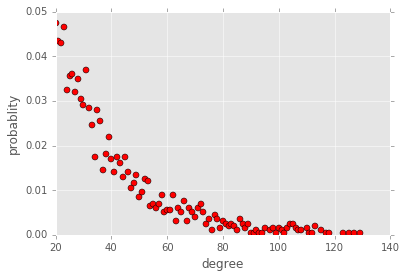

In [27]:
plot_pdf(G2)

Degree distribution starts to resemble exponential. To verify that guess, let's increase N to 4000 and m to 50

99.362499999999997

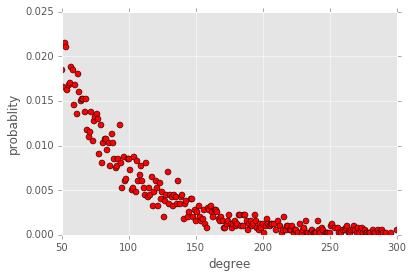

In [28]:
G3 = growg(4000,50)
plot_pdf(G3)
mean = np.mean(list(G3.degree().values()))
mean

MLE of $\lambda$ of exponential distribution is given by $\frac{1}{\bar{x}}$ where $\bar{x}$ stands for samle mean, which in our case (N=4000, m=50) equals to 99.36. So lambda is approx. equal to 0.01

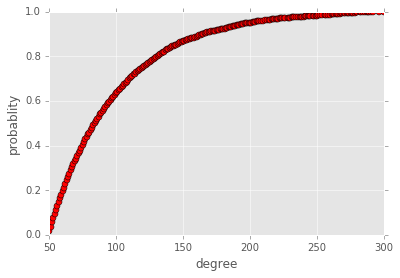

In [29]:
plot_cdf(G3)

Now let's look at degree distribution in graphs, generated according to model B:

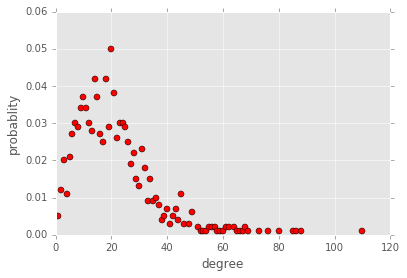

In [30]:
G4 = prefg(1000,20)
G5 = prefg(2000,20)
plot_pdf(G4)

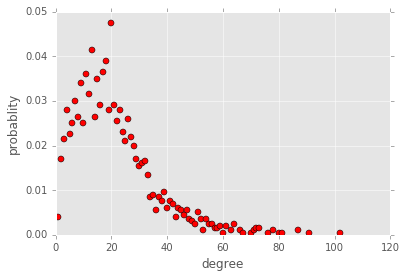

In [31]:
plot_pdf(G5)

Distribution starts to resemble normal, to verify that let's generate a large graph:

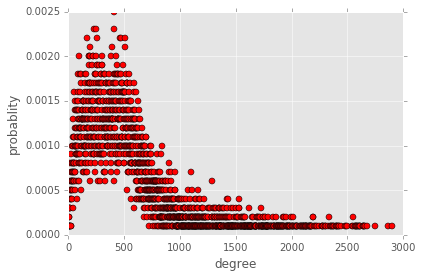

In [32]:
G6 = prefg(10000,500)
plot_pdf(G6)

If we assume, that distribution is indeed normal, it's parameters are given by mean and standard deviation of the sample:

In [33]:
sd = np.std(list(G6.degree().values()))
mean  = np.mean(list(G6.degree().values()))
print(sd)
print(mean)

392.299700957
497.4712


For illustrating network averages we'll use the following way: first fix m and vary number of nodes, then do the opposite

Using fixed m we get following dependencies:

In [34]:
#generate shortest paths for m =20, model A
sp_A = {}
#average clustering for m = 20, model A
cl_A = {}
m = 20
for i in [x*250 for x in range(4,13)]:       
        G = growg(i,m)
        sp_A[i]=nx.average_shortest_path_length(G)
        cl_A[i]=nx.average_clustering(G)
#same for B
sp_B = {}
cl_B = {}
for i in [x*250 for x in range(4,13)]:
    G = prefg(i,m)
    sp_B[i]=nx.average_shortest_path_length(G)
    cl_B[i]=nx.average_clustering(G)


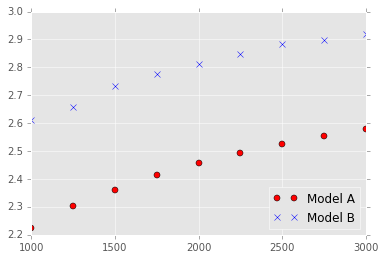

In [35]:
#plot shortest paths for both models and m =20
plt.plot(list(sp_A.keys()),list(sp_A.values()), 'ro', label ='Model A')
plt.plot(list(sp_B.keys()), list(sp_B.values()), 'x', c = 'blue', label = 'Model B')
plt.legend(loc = 'lower right')

With fixed m and increasing number of total verticies both models show stable increase in average short path length, but not very significant. Although, pathes in model A (no preferential attachement) tend to be shorter, than in model B (no growth factor).

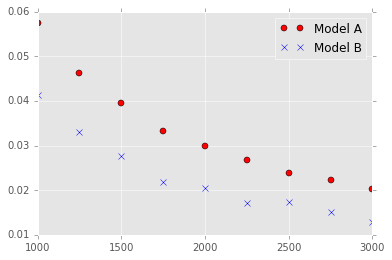

In [36]:
#plot average clustrings for both models and m =20
plt.plot(list(cl_A.keys()),list(cl_A.values()), 'ro', label ='Model A')
plt.plot(list(cl_B.keys()), list(cl_B.values()), 'x',c = 'blue', label = 'Model B')
plt.legend(loc = 'upper right')

With fixed m and increasing number of vertices average clustering tends to zero in both cases.

Now we fix number of nodes and vary m:

In [37]:
start = timer()
#model A
sp_A_m = {}
cl_A_m = {}
m = [i*5 for i in range(1,13)]
for i in m:       
    G = growg(2000,i)
    sp_A_m[i]=nx.average_shortest_path_length(G)
    cl_A_m[i]=nx.average_clustering(G)
#model B 
sp_B_m = {}
cl_B_m = {}
m = [i*5 for i in range(1,13)]
for i in m:       
    G = prefg(2000,i)
    sp_B_m[i]=nx.average_shortest_path_length(G)
    cl_B_m[i]=nx.average_clustering(G)
end = timer()
print(end - start) 

404.2543066934176


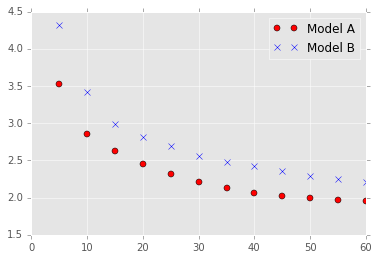

In [38]:
#plot average shortest paths for N = 2000
plt.plot(list(sp_A_m.keys()),list(sp_A_m.values()), 'ro', label ='Model A')
plt.plot(list(sp_B_m.keys()),list(sp_B_m.values()), 'x', c = 'blue', label ='Model B')  
plt.legend(loc = 'upper right')

Now when number of vertices stays the same each iteration and only m increases, we can see that average path length is getting smaller in both models. With further increase of m past 60 effect will not be so significant: for average path to drop to 1 m probably should reach values, which are comparable to N.

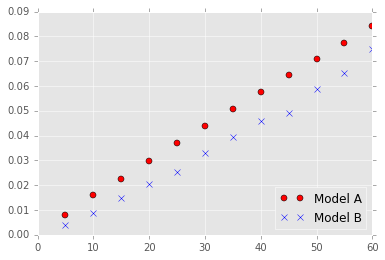

In [39]:
#plot average clustrings for N=2000
plt.plot(list(cl_A_m.keys()),list(cl_A_m.values()), 'ro', label ='Model A')
plt.plot(list(cl_B_m.keys()), list(cl_B_m.values()), 'x',c = 'blue', label = 'Model B')
plt.legend(loc = 'lower right')

Average clustering for model A increases pretty much linearly: for each increase in m (in our case each increase eqauls to 5) we get almost 0.01 increase in average clustering. For model B increase in clustering seems almost linear too, but when m reaches 60 there is almost no increase at all, so further research is required.

In [40]:
def average_degree_to_age(G):
    deg_dict = G.degree()
    values = list(deg_dict.values())
    x = list(deg_dict.keys())
    y = []
    cumsum = np.cumsum(values)
    for i in range(len(deg_dict.values())):
        y.append(cumsum[i]/(i+1))
    plt.plot(x,y)
    plt.ylabel('Average node degree')
    plt.xlabel('Node age')
    plt.show()

First, lets take a look at model A with N=4000 and m = 50:

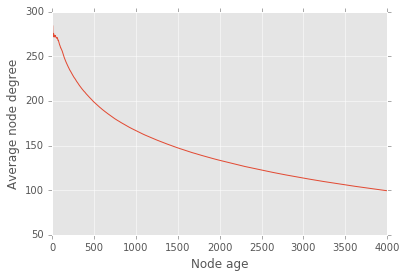

In [41]:
average_degree_to_age(G3)

What happens, if we keep N the same, but increase m?


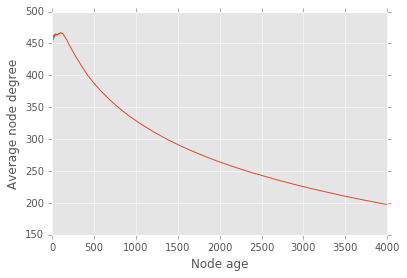

In [42]:
G7 = growg(4000,100)
average_degree_to_age(G7)

In both cases the same rule applies: monotonical descent of average node's degree with increase of node's age starting from some point very early on. 

Now let's apply the same reasoning to model B: although there is no growth, a proper substitute for node's age will be the step we chose it in our building algorithm

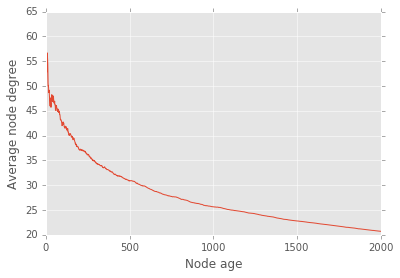

In [43]:
#Use G5 with N=2000 m = 20
average_degree_to_age(G5)

With small N and m there are alot more fluctuations in the beginning, but as we connect more and more nodes average node degree of graph tends to m. To verify that let's use large graph G6 with N=10000 and m = 500

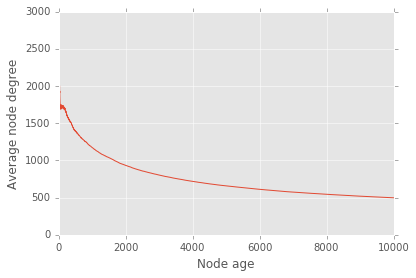

In [44]:
average_degree_to_age(G6)

In order to check, if both models are scale-free, we can look at log-log plot - it should look like power law's log-log plot.

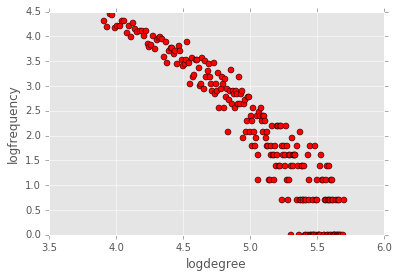

In [45]:
def plot_degrees(G, log):
    # get degrees of nodes
    deg_dict = G.degree()
    # degree frequencies
    deg_freq = Counter(deg_dict.values())
    y_net = list(deg_freq.values())
    x_net = list(deg_freq.keys())
    #plot distribution
    if log == False:
        plt.plot(x_net,y_net, 'ro')
        plt.ylabel('frequency')
        plt.xlabel('degree')   
    if log ==True:
        plt.plot(np.log(x_net),np.log(y_net), 'ro')
        plt.ylabel('logfrequency')
        plt.xlabel('logdegree')   
#Model A
plot_degrees(G3, True)

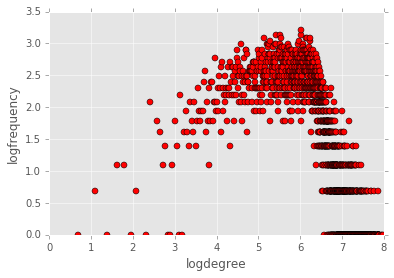

In [46]:
#Model B
plot_degrees(G6,True)

In both cases log-log plot doesn't look like staright line, so both models are not scale-free

 ### <center> Task 2 </center>

As we did in task 1, first we define function, to generate graphs, according to model

In [4]:
def copyg(n,q, directed):
    if directed == True:        
        G = nx.binomial_graph(10,0.3, directed = True)
    else:
        G = nx.binomial_graph(10,0.3)
    count = 10
    while count < n:
        #choose vertex and copy all its edges
        candidates = G.nodes()
        node = random.choice(candidates)
        neighbors = G.neighbors(node) 
        targets = []                   
        v = count+1
        G.add_node(v)
        for i in neighbors:            
            rand = random.random()            
            if rand < q:
                targets.append(i)
            else:   
                k = random.choice(candidates)
                targets.append(k)
                candidates.remove(k)
        G.add_edges_from(zip([v]*len(neighbors),targets))
        count+=1
    return G
#plotting function for directed case
def plot_in_vs_out(G,log):
    # get degrees of nodes
    deg_dict_in = G.in_degree()
    deg_dict_out = G.out_degree()
    # degree frequencies
    deg_freq_in = Counter(deg_dict_in.values())
    deg_freq_out = Counter(deg_dict_out.values())
    y_in = list(deg_freq_in.values())
    x_in = list(deg_freq_in.keys())
    y_out = list(deg_freq_out.values())
    x_out = list(deg_freq_out.keys())
    #plot distribution
    if log == False:
        plt.plot(x_in,y_in, 'ro', label = 'In degree')
        plt.plot(x_out,y_out, 'x', c = 'blue', label = 'Out degree')
        plt.legend(loc = 'upper right')
        plt.ylabel('frequency')
        plt.xlabel('degree')   
    if log ==True:
        plt.plot(np.log(x_in),np.log(y_in), 'ro',label = 'In degree')
        plt.plot(np.log(x_out),np.log(y_out), 'x', c = 'blue', label = 'Out degree')
        plt.legend(loc = 'upper right')
        plt.ylabel('logfrequency')
        plt.xlabel('logdegree')      

Let's plot degree distribution for undirected case:

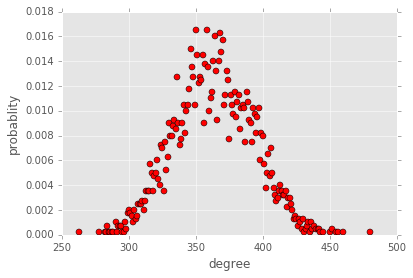

In [5]:
G8 = copyg(4000,0.35,False)
plot_pdf(G8)

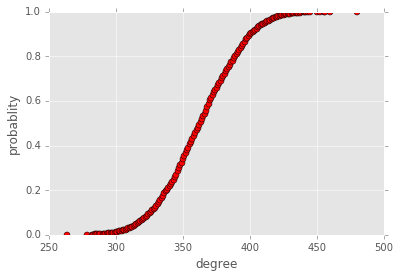

In [7]:
plot_cdf(G8)

In [10]:
mean_8 = np.mean(list(G8.degree().values()))
sd_8 = np.std(list(G8.degree().values()))
print(mean_8)
print(sd_8)

363.5005
29.0455160008


In this case distribution is very close to normal with mean 363 and deviation 29. What if we increase q, while keeping number of vertices the same?

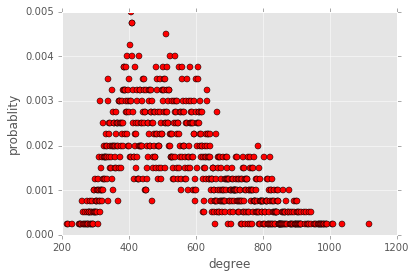

In [6]:
G9 = copyg(4000,0.8,False)
plot_pdf(G9)

When q approaches 1, distribution no longer resembles normal

Now let's generate directed graph according to this model:

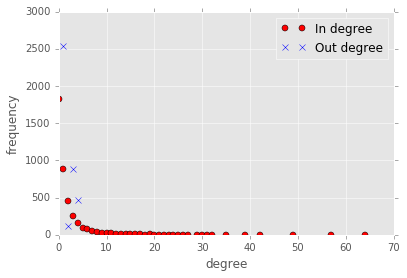

In [11]:
G10 = copyg(4000,0.35,True)
plot_in_vs_out(G10,False)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: RuntimeWarning: divide by zero encountered in log


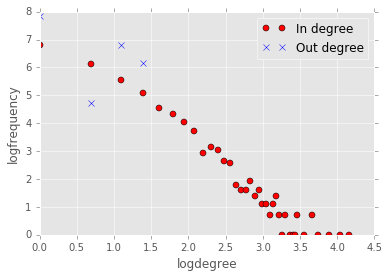

In [12]:
plot_in_vs_out(G10,True)

Resulting distribution of in degrees is power law. As for out degrees, they vary between 0 and maximum out degree of initial (before first node was copied) graph.

For next step we perform same analysis, as we did in task 1: generate some number of graphs, while varying number of vertices and keeping q the same.

In [13]:
sp_C = {}
cl_C = {}
for i in [x*250 for x in range(4,13)]:
    G = copyg(i,0.3, False)
    sp_C[i]=nx.average_shortest_path_length(G)
    cl_C[i]=nx.average_clustering(G)


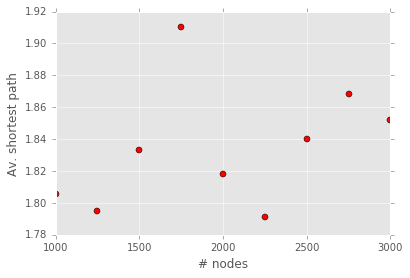

In [15]:
plt.plot(list(sp_C.keys()),list(sp_C.values()), 'ro', label ='Undirected')
plt.xlabel('# nodes')
plt.ylabel('Av. shortest path')

There is no clear dependency between increase in number of nodes and length of average shortest path.

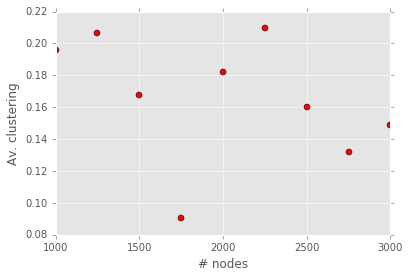

In [16]:
plt.plot(list(cl_C.keys()),list(cl_C.values()), 'ro', label ='Undirected')
plt.xlabel('# nodes')
plt.ylabel('Av. clustering')

Also, there is no dependece between number of nodes and clustering either. Now let's fix number of nodes and change q.

In [20]:
sp_C_q = {}
cl_C_q = {}
for q in [x*0.1 for x in range(1,10)]:
    G = copyg(2000,q, False)
    sp_C_q[q]=nx.average_shortest_path_length(G)
    cl_C_q[q]=nx.average_clustering(G)

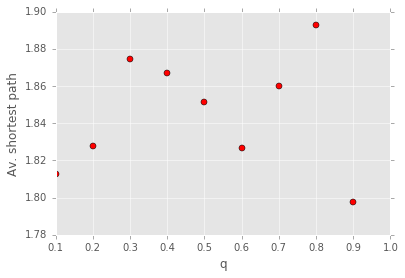

In [21]:
plt.plot(list(sp_C_q.keys()),list(sp_C_q.values()), 'ro', label ='Undirected')
plt.xlabel('q')
plt.ylabel('Av. shortest path')

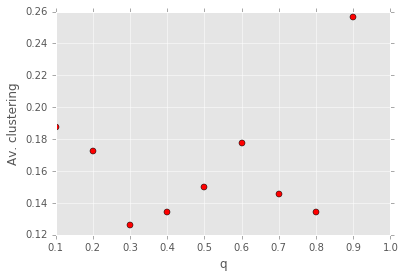

In [22]:
plt.plot(list(cl_C_q.keys()),list(cl_C_q.values()), 'ro', label ='Undirected')
plt.xlabel('q')
plt.ylabel('Av. clustering')

Increase in q doesn't really say much about clustering/shortest paths (of course, when it's equal to 1, resulting network will look like initial one, except for number of nodes). 

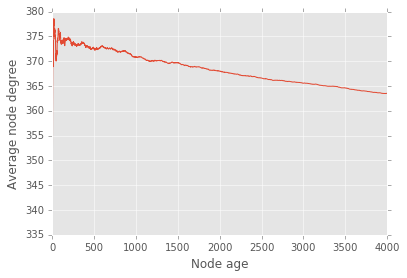

In [23]:
average_degree_to_age(G8)

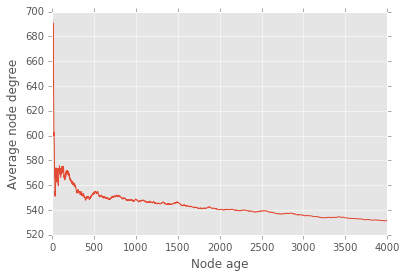

In [24]:
average_degree_to_age(G9)

Average node degree tends to fall, although with some interesting fluctuations in the beginning. As time passes by, average node degree decreases.